### Kernel Density Estimation

In [1]:
import numpy as np
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.distributions.mixture_rvs import mixture_rvs

/Users/gyg/anaconda/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


#### A univariate example.

In [2]:
np.random.seed(12345)

In [3]:
obs_dist1 = mixture_rvs([.25,.75], size=10000, dist=[stats.norm, stats.norm],
                kwargs = (dict(loc=-1,scale=.5),dict(loc=1,scale=.5)))

In [4]:
kde = sm.nonparametric.KDEUnivariate(obs_dist1)
kde.fit()

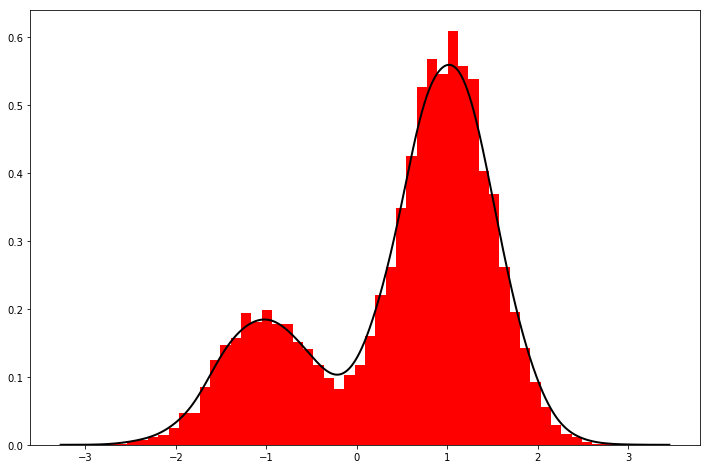

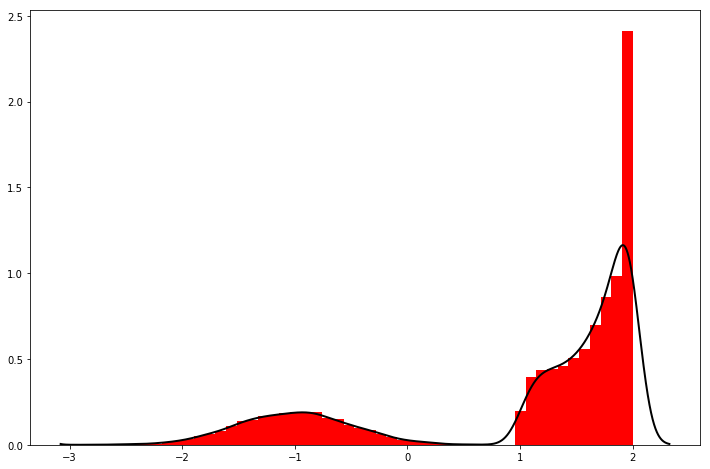

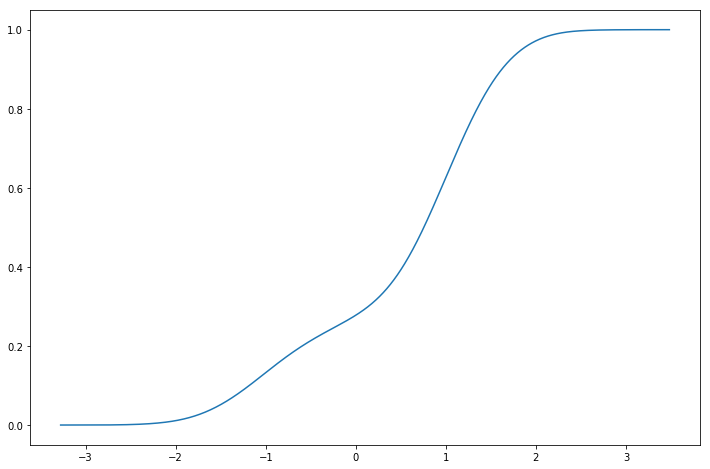

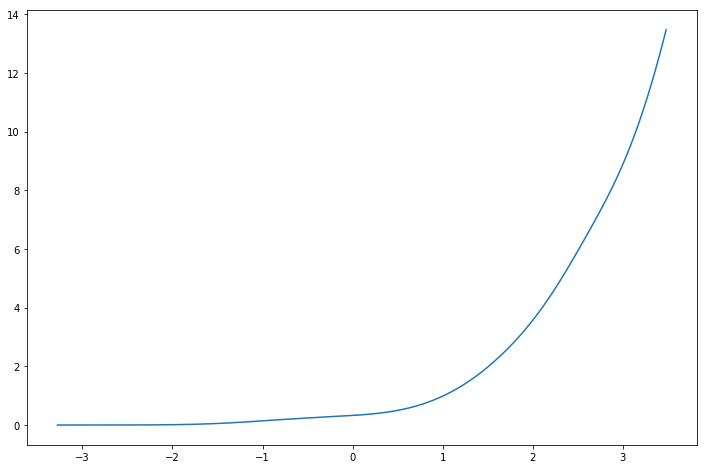

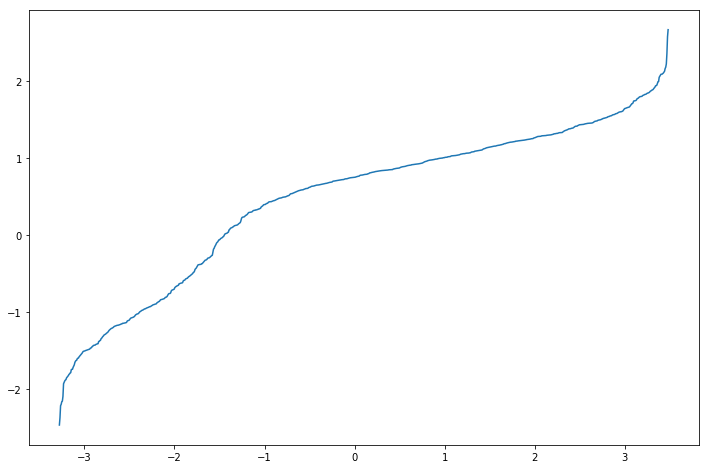

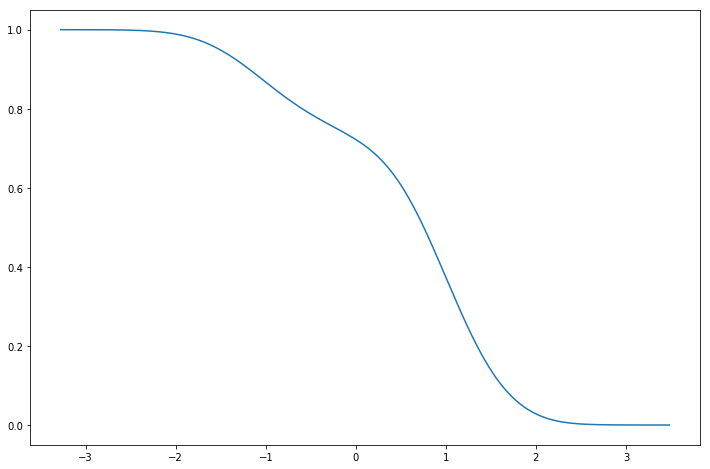

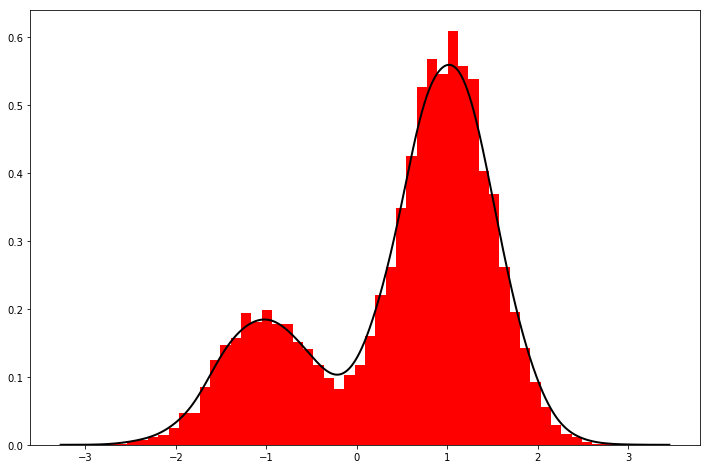

In [15]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
ax.hist(obs_dist1, bins=50, normed=True, color='red')
ax.plot(kde.support, kde.density, lw=2, color='black');
plt.show()

In [6]:
obs_dist2 = mixture_rvs([.25,.75], size=10000, dist=[stats.norm, stats.beta],
            kwargs = (dict(loc=-1,scale=.5),dict(loc=1,scale=1,args=(1,.5))))

kde2 = sm.nonparametric.KDEUnivariate(obs_dist2)
kde2.fit()

In [7]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
ax.hist(obs_dist2, bins=50, normed=True, color='red')
ax.plot(kde2.support, kde2.density, lw=2, color='black');

In [8]:
obs_dist3 = mixture_rvs([.25,.75], size=1000, dist=[stats.norm, stats.norm],
                kwargs = (dict(loc=-1,scale=.5),dict(loc=1,scale=.5)))
kde3 = sm.nonparametric.KDEUnivariate(obs_dist3)
kde3.fit()

In [9]:
kde3.entropy

1.3343301918419768

In [10]:
kde3.evaluate(-1)

array([ 0.17992591])

#### CDF

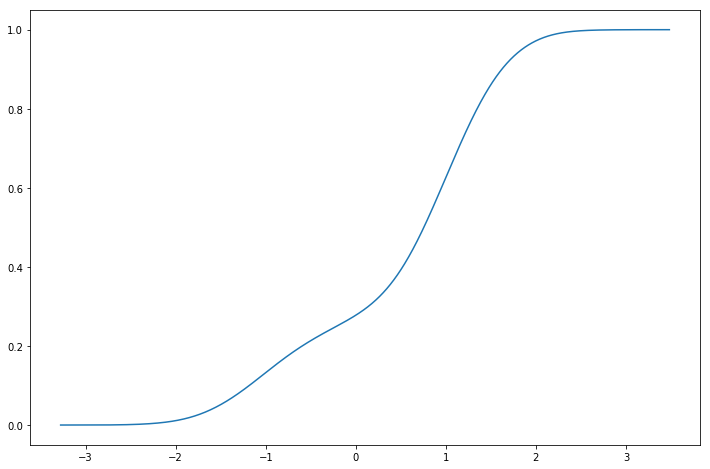

In [16]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
ax.plot(kde3.support, kde3.cdf);
plt.show()

#### Cumulative Hazard Function

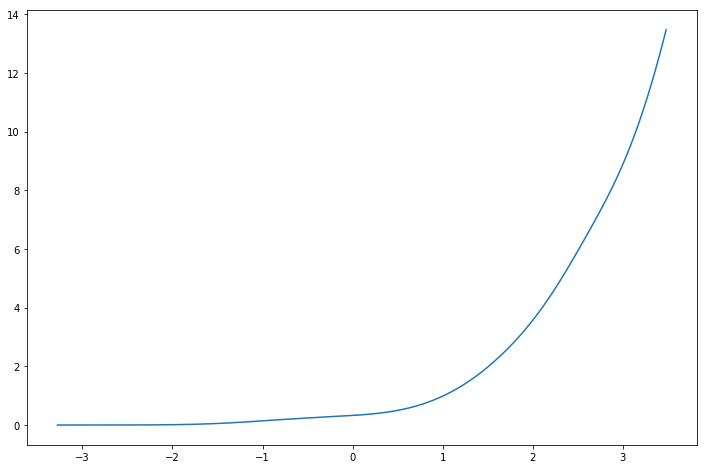

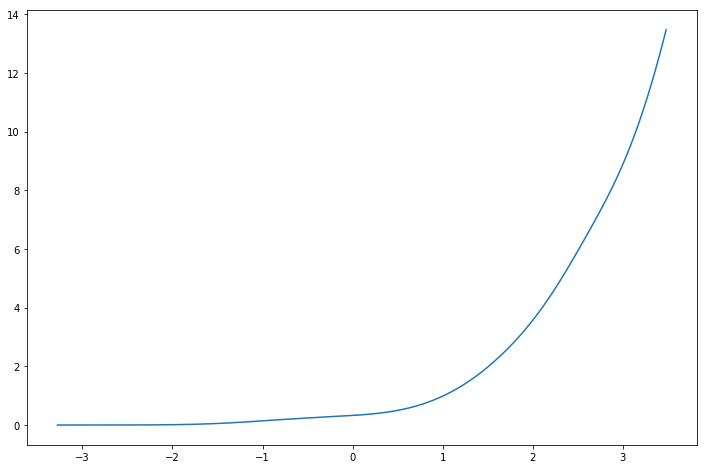

In [18]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
ax.plot(kde3.support, kde3.cumhazard);
plt.show()

#### Inverse CDF

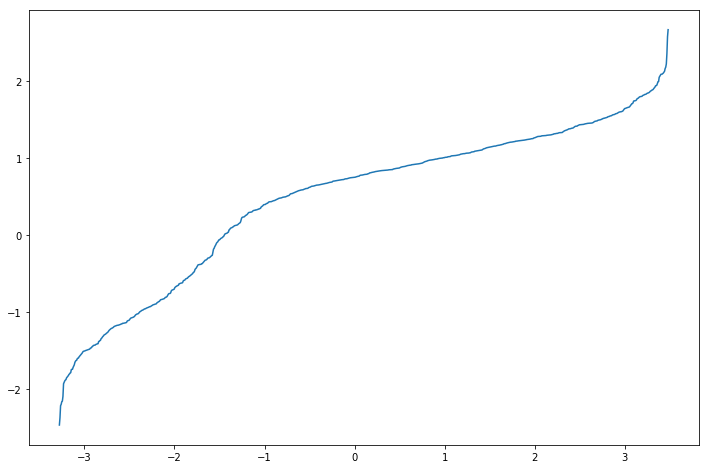

In [19]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
ax.plot(kde3.support, kde3.icdf);
plt.show()

#### Survival Function

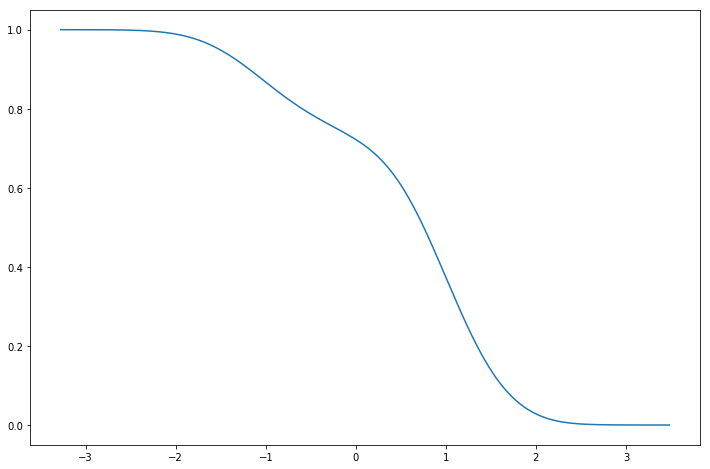

In [20]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
ax.plot(kde3.support, kde3.sf);
plt.show()